<a href="https://colab.research.google.com/github/kennedy1993/AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
# Junta os dados das quatro lojas em um único DataFrame
lojas = pd.concat([loja, loja2, loja3, loja4])

# Faturamento total (soma do preço de todos os produtos vendidos)
faturamento_total = lojas['Preço'].sum()
print(f"Faturamento total: R$ {faturamento_total:,.2f}")


Faturamento total: R$ 5,871,490.79


## Gráfico de pizza sobre análise de faturamento

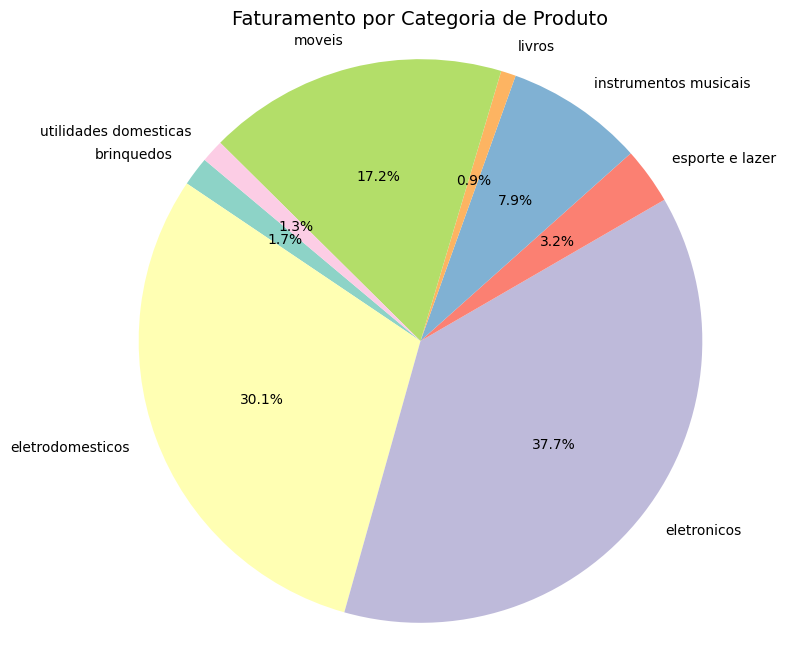

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Importando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenando os dados das quatro lojas
lojas = pd.concat([loja1, loja2, loja3, loja4])

# Agrupando o faturamento por categoria de produto
faturamento_categoria = lojas.groupby("Categoria do Produto")["Preço"].sum()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(faturamento_categoria, labels=faturamento_categoria.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Faturamento por Categoria de Produto", fontsize=14)
plt.axis('equal')  # Garante que o gráfico fique circular
plt.show()


# 2. Vendas por Categoria


In [6]:
faturamento_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(faturamento_categoria)


Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [10]:
import pandas as pd

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Importando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Cálculo da média de avaliação por loja
media_loja1 = loja1["Avaliação da compra"].mean()
media_loja2 = loja2["Avaliação da compra"].mean()
media_loja3 = loja3["Avaliação da compra"].mean()
media_loja4 = loja4["Avaliação da compra"].mean()

# Juntando todas as lojas para média geral
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])
media_geral = todas_lojas["Avaliação da compra"].mean()

# Exibindo os resultados
print(f"Média de avaliação da Loja 1: {media_loja1:.2f}")
print(f"Média de avaliação da Loja 2: {media_loja2:.2f}")
print(f"Média de avaliação da Loja 3: {media_loja3:.2f}")
print(f"Média de avaliação da Loja 4: {media_loja4:.2f}")
print(f"\nMédia geral de avaliação das quatro lojas: {media_geral:.2f}")


Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00

Média geral de avaliação das quatro lojas: 4.01


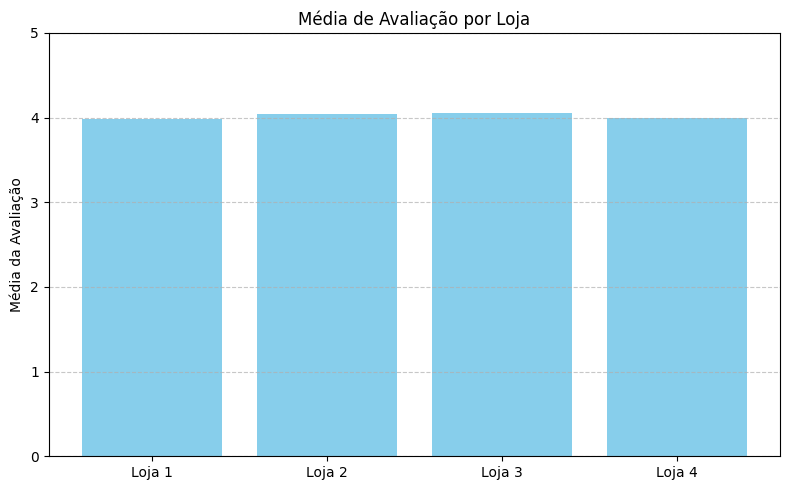

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Importando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Cálculo da média de avaliação por loja
medias = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(medias.keys(), medias.values(), color='skyblue')
plt.title("Média de Avaliação por Loja")
plt.ylabel("Média da Avaliação")
plt.ylim(0, 5)  # Avaliações variam de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [12]:
import pandas as pd

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Importando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenando todos os dados em um único DataFrame
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Contagem de produtos vendidos (quantidade de vezes que foram vendidos)
mais_vendidos = todas_lojas['Produto'].value_counts().head(10)
menos_vendidos = todas_lojas['Produto'].value_counts().tail(10)

# Exibindo os resultados
print("🔝 Produtos Mais Vendidos:")
print(mais_vendidos)

print("\n🔽 Produtos Menos Vendidos:")
print(menos_vendidos)


🔝 Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

🔽 Produtos Menos Vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


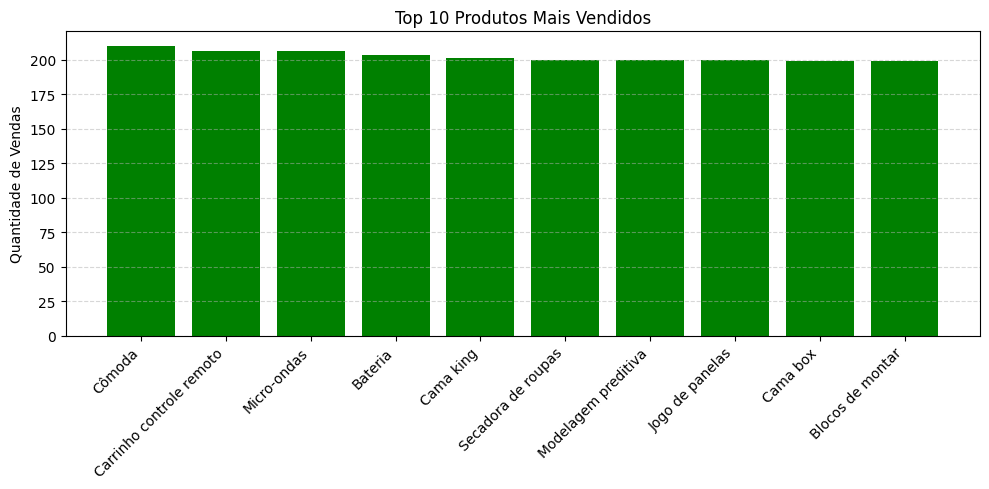

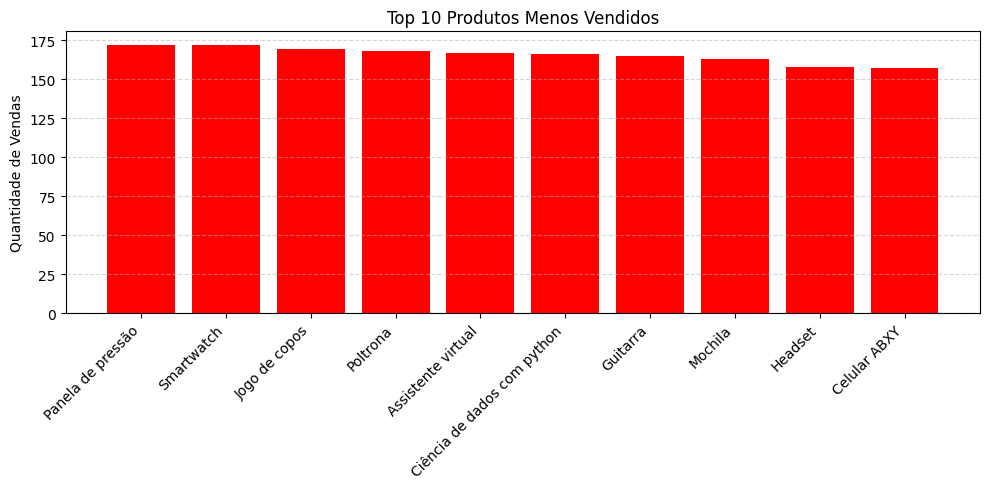

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Importando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenando todos os dados
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Contagem dos produtos vendidos
contagem_produtos = todas_lojas["Produto"].value_counts()

# Separando os mais e menos vendidos
mais_vendidos = contagem_produtos.head(10)
menos_vendidos = contagem_produtos.tail(10)

# Gráfico de produtos mais vendidos
plt.figure(figsize=(10, 5))
plt.bar(mais_vendidos.index, mais_vendidos.values, color="green")
plt.title("Top 10 Produtos Mais Vendidos")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Gráfico de produtos menos vendidos
plt.figure(figsize=(10, 5))
plt.bar(menos_vendidos.index, menos_vendidos.values, color="red")
plt.title("Top 10 Produtos Menos Vendidos")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 5. Frete Médio por Loja


In [14]:
import pandas as pd

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Calculando frete médio por loja
frete_medio_loja1 = loja1["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Exibindo os resultados
print(f"🚚 Frete médio da Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"🚚 Frete médio da Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"🚚 Frete médio da Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"🚚 Frete médio da Loja 4: R$ {frete_medio_loja4:.2f}")


🚚 Frete médio da Loja 1: R$ 34.69
🚚 Frete médio da Loja 2: R$ 33.62
🚚 Frete médio da Loja 3: R$ 33.07
🚚 Frete médio da Loja 4: R$ 31.28


## Relatorio

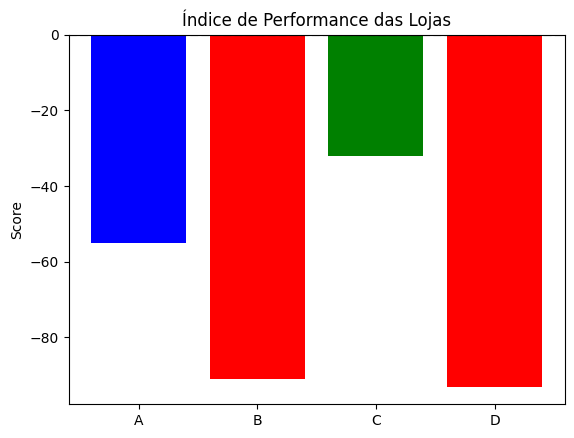

In [17]:
import matplotlib.pyplot as plt

lojas = ['A', 'B', 'C', 'D']
indices = [-55, -91, -32, -93]

plt.bar(lojas, indices, color=['blue', 'red', 'green', 'red'])
plt.title('Índice de Performance das Lojas')
plt.ylabel('Score')
plt.axhline(0, color='black', linestyle='--')
plt.show()

com base aos dados analizados a loja D deve ser vendida devido a: Crescimento negativo (-5%), Margem de lucro muito baixa (6%), Localização desfavorável (periferia) e o Índice de performance mais baixo (-93)